In [1]:
# Importing Required Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Reading the data sets from Excel files

earthquake = pd.read_excel('Research_Project_MDS6406/Datasets/earthquake_final.xlsx')

storm = pd.read_excel('Research_Project_MDS6406/Datasets/storm_final.xlsx')

flood = pd.read_excel('Research_Project_MDS6406/Datasets/flood_final.xlsx')

## EDA with earthquake data set

In [3]:
# Read first few rows of earthquake

earthquake.head()

,TDEQ,TAEQ,Country,Year,LE,PD,POP,gdp,gexp,gdpg,gr,TotalHarm,di,dic,td,dic2
0,23,200,Bangladesh,1997,63.553,923.104894,120160564,401.498691,4.902982,0.017180,0.007398,223,1.855850e-06,0,24,0
1,6,15200,Bangladesh,1999,64.881,961.739656,125189651,409.543197,5.039615,0.005189,0.002248,15206,1.214637e-04,0,7,1
2,0,1000,Bangladesh,2000,65.447,980.701037,127657854,418.068968,4.973121,0.020818,0.008948,1000,7.833439e-06,0,1,0
3,2,2525,Bangladesh,2003,66.886,1035.504364,134791603,446.310659,5.128299,0.080445,0.033603,2527,1.874746e-05,0,3,0
4,2,0,Bangladesh,2004,67.331,1052.365614,136986432,475.291920,5.174383,0.064935,0.027323,2,1.459999e-08,0,3,0


In [4]:
# Get the column names

earthquake.columns

Index(['TDEQ', 'TAEQ', 'Country', 'Year', 'LE', 'PD', 'POP', 'gdp', 'gexp',
       'gdpg', 'gr', 'TotalHarm', 'di', 'dic', 'td', 'dic2'],
      dtype='object')

In [5]:
# Get the shape of earth_data

earthquake.shape

(87, 16)

In [6]:
# Check for any missing values

earthquake.isnull().sum()

TDEQ         0
TAEQ         0
Country      0
Year         0
LE           0
PD           0
POP          0
gdp          0
gexp         0
gdpg         0
gr           0
TotalHarm    0
di           0
dic          0
td           0
dic2         0
dtype: int64

In [7]:
# Check Unique Entries of the 'country' column

earthquake['Country'].unique()

array(['Bangladesh', 'India', 'Indonesia', 'Iran, Islamic Rep.',
       'Malaysia', 'Myanmar', 'Nepal', 'Pakistan', 'Philippines',
       'Sri Lanka'], dtype=object)

In [8]:
# Now, in the study, I consider only 9 countries that fall under south Asia.
# So, just keep 'India', 'Bangladesh', 'Pakistan', 'Sri Lanka', 'Maldives', 'Iran', 'Bhutan', 'Afghanistan' and 'Nepal'

country_remove = ['Indonesia', 'Malaysia', 'Myanmar', 'Philippines']

# Filter out the rows where 'Country' is in the list of countries to remove

earthquake_filtered = earthquake[~ earthquake['Country'].isin(country_remove)]

# Check the Current countries under consideration

earthquake_filtered['Country'].unique()

array(['Bangladesh', 'India', 'Iran, Islamic Rep.', 'Nepal', 'Pakistan',
       'Sri Lanka'], dtype=object)

Country
Bangladesh            0.000152
India                 0.008114
Iran, Islamic Rep.    0.006029
Nepal                 0.006732
Pakistan              0.001064
Sri Lanka             0.001470
Name: di, dtype: float64


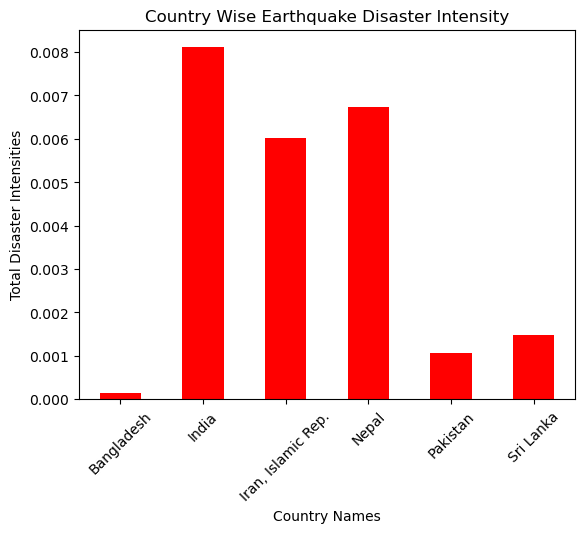

In [9]:
# Now, plot the total disaster intensity graph for this countries

total_earthquake_di = earthquake_filtered.groupby('Country')['di'].sum()
print(total_earthquake_di)
total_earthquake_di.plot(kind = 'bar', color = 'red', width = 0.5)
plt.xlabel('Country Names')
plt.ylabel('Total Disaster Intensities')
plt.title('Country Wise Earthquake Disaster Intensity')
plt.xticks(rotation = 45)
plt.show()

## EDA with storm data set

In [10]:
# Read first few rows of storm

storm.head()

,TDS,TAS,Country,Year,LE,PD,POP,TotalHarm,gdp,gexp,gdpg,gr,pcg,Total,di,dic,td,dic2
0,674,54070,Bangladesh,1990,58.210,792.593962,103171956,2011831,306.268704,4.053250,0.071509,0.029996,3.086984,54744,0.000531,0,675,1
1,138987,15439149,Bangladesh,1991,58.891,811.240124,105599127,2990265,293.160416,4.136332,-0.042800,-0.018997,1.106644,15578136,0.147521,1,138988,1
2,23,10300,Bangladesh,1992,59.618,829.559069,107983704,75217,293.644998,4.451222,0.001653,0.000717,3.114221,10323,0.000096,0,24,0
3,452,868020,Bangladesh,1993,60.388,847.742483,110350639,15751807,300.555753,4.953839,0.023534,0.010102,2.465581,868472,0.007870,0,453,1
4,205,659009,Bangladesh,1994,61.190,866.080380,112737683,395216,299.533040,4.883159,-0.003403,-0.001480,1.690416,659214,0.005847,0,206,1


In [11]:
# Get the column names

storm.columns

Index(['TDS', 'TAS', 'Country', 'Year', 'LE', 'PD', 'POP', 'TotalHarm', 'gdp',
       'gexp', 'gdpg', 'gr', 'pcg', 'Total', 'di', 'dic', 'td', 'dic2'],
      dtype='object')

In [12]:
# Get the shape of storm

storm.shape

(183, 18)

In [13]:
# Check for any missing values

storm.isnull().sum()

TDS          0
TAS          0
Country      0
Year         0
LE           0
PD           0
POP          0
TotalHarm    0
gdp          0
gexp         0
gdpg         0
gr           0
pcg          0
Total        0
di           0
dic          0
td           0
dic2         0
dtype: int64

In [14]:
# Check Unique Entries of the 'country' column

storm['Country'].unique()

array(['Bangladesh', 'Bhutan', 'Cambodia', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Lao PDR', 'Malaysia', 'Myanmar', 'Nepal',
       'Pakistan', 'Philippines', 'Sri Lanka', 'Thailand', 'Timor-Leste',
       'Vietnam'], dtype=object)

In [15]:
# Now, in the study, I consider only 9 countries that fall under south Asia.
# So, just keep 'India', 'Bangladesh', 'Pakistan', 'Sri Lanka', 'Maldives', 'Iran', 'Bhutan', 'Afghanistan' and 'Nepal'

country_remove = ['Cambodia', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Philippines', 'Thailand','Timor-Leste', 'Vietnam']

# Filter out the rows where 'Country' is in the list of countries to remove

storm_filtered = storm[~ storm['Country'].isin(country_remove)]

# Check the Current countries under consideration

storm_filtered['Country'].unique()

array(['Bangladesh', 'Bhutan', 'India', 'Iran, Islamic Rep.', 'Nepal',
       'Pakistan', 'Sri Lanka'], dtype=object)

Country
Bangladesh            0.368923
Bhutan                0.122254
India                 0.050034
Iran, Islamic Rep.    0.000067
Nepal                 0.013757
Pakistan              1.603563
Sri Lanka             0.001979
Name: di, dtype: float64


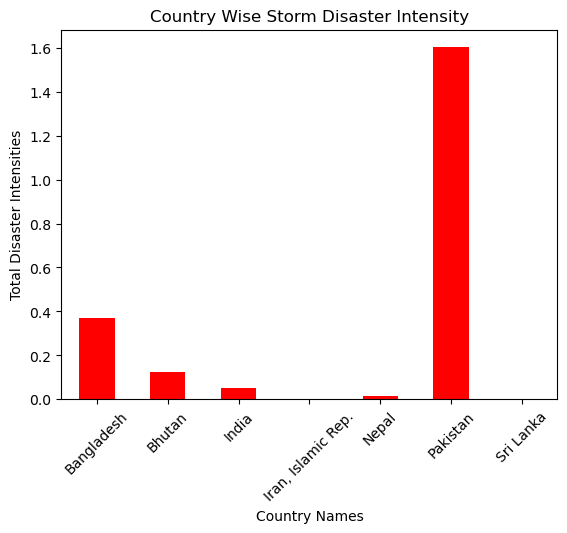

In [16]:
# Now, plot the total disaster intensity graph for this countries

total_storm_di = storm_filtered.groupby('Country')['di'].sum()
print(total_storm_di)
total_storm_di.plot(kind = 'bar', color = 'red', width = 0.5)
plt.xlabel('Country Names')
plt.ylabel('Total Disaster Intensities')
plt.title('Country Wise Storm Disaster Intensity')
plt.xticks(rotation = 45)
plt.show()

## EDA with flood data

In [17]:
# Get the first few rows of the flood data

flood.head()

,Country,Year,TD,TA,LE,PD,POP,Total,gdp,gexp,gdpg,gr,pcg,di,dic,td,dic2
0,Bangladesh,1990,231,2011600,58.210,792.593962,103171956,2011831,306.268704,4.053250,0.071509,0.029996,3.086984,0.019500,1,232,1
1,Bangladesh,1991,265,2990000,58.891,811.240124,105599127,2990265,293.160416,4.136332,-0.042800,-0.018997,1.106644,0.028317,1,266,1
2,Bangladesh,1992,17,75200,59.618,829.559069,107983704,75217,293.644998,4.451222,0.001653,0.000717,3.114221,0.000697,0,18,1
3,Bangladesh,1993,194,15751613,60.388,847.742483,110350639,15751807,300.555753,4.953839,0.023534,0.010102,2.465581,0.142743,1,195,1
4,Bangladesh,1994,116,395100,61.190,866.080380,112737683,395216,299.533040,4.883159,-0.003403,-0.001480,1.690416,0.003506,0,117,1


In [18]:
# Get the Column names

flood.columns

Index(['Country', 'Year', 'TD', 'TA', 'LE', 'PD', 'POP', 'Total', 'gdp',
       'gexp', 'gdpg', 'gr', 'pcg', 'di', 'dic', 'td', 'dic2'],
      dtype='object')

In [19]:
# Get the shape of the flood data

flood.shape

(321, 17)

In [20]:
# Get the number of missing values in flood data

flood.isnull().sum()

Country    0
Year       0
TD         0
TA         0
LE         0
PD         0
POP        0
Total      0
gdp        0
gexp       0
gdpg       0
gr         0
pcg        0
di         0
dic        0
td         0
dic2       0
dtype: int64

In [21]:
# Get the Uniqye countries from the data

flood['Country'].unique()

array(['Bangladesh', 'Bhutan', 'Cambodia', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Lao PDR', 'Malaysia', 'Myanmar', 'Nepal',
       'Pakistan', 'Philippines', 'Sri Lanka', 'Thailand', 'Timor-Leste',
       'Vietnam'], dtype=object)

In [22]:
# Extract the Information for the below 9 countries
# 'India', 'Bangladesh', 'Pakistan', 'Sri Lanka', 'Maldives', 'Iran', 'Bhutan', 'Afghanistan' and 'Nepal'

country_remove = ['Cambodia','Indonesia','Lao PDR','Malaysia','Myanmar','Philippines','Thailand','Timor-Leste','Vietnam']

# Filter out the rows where 'Country' is in the list of countries to remove

flood_filtered = flood[~ flood['Country'].isin(country_remove)]

# Check the Current countries under consideration

flood_filtered['Country'].unique()

array(['Bangladesh', 'Bhutan', 'India', 'Iran, Islamic Rep.', 'Nepal',
       'Pakistan', 'Sri Lanka'], dtype=object)

Country
Bangladesh            1.074156
Bhutan                0.003200
India                 0.584367
Iran, Islamic Rep.    0.113839
Nepal                 2.613369
Pakistan              0.168420
Sri Lanka             0.041879
Name: di, dtype: float64


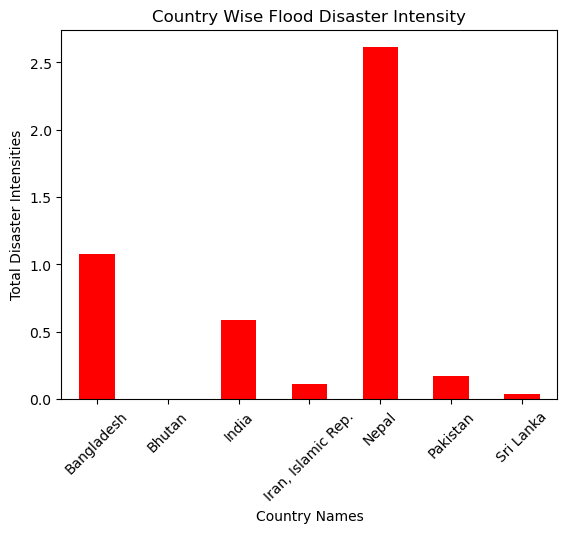

In [23]:
# Now, plot the total disaster intensity graph for this countries

total_flood_di = flood_filtered.groupby('Country')['di'].sum()
print(total_flood_di)
total_flood_di.plot(kind = 'bar', color = 'red', width = 0.5)
plt.xlabel('Country Names')
plt.ylabel('Total Disaster Intensities')
plt.title('Country Wise Flood Disaster Intensity')
plt.xticks(rotation = 45)
plt.show()